In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

## We should use combine dataset that we create in last notebook

In [2]:
df = pd.read_csv("/content/drive/My Drive/vqa/Compasbias/Combine/combinedata.csv")
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,Female-African-American,Female-Caucasian,Female-Hispanic,Male-African-American,Male-Caucasian,Male-Hispanic
0,34,3,0,10.0,1.0,1,1,False,False,False,True,False,False
1,24,4,4,1.0,1.0,0,1,False,False,False,True,False,False
2,23,8,1,0.0,1.0,0,0,False,False,False,True,False,False
3,41,6,14,6.0,1.0,0,1,False,False,False,False,True,False
4,39,1,0,2.0,1.0,0,0,False,True,False,False,False,False


In [4]:
# Calculate class distribution
class_distribution = df['is_recid'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 is_recid
0    51.289229
1    48.710771
Name: proportion, dtype: float64


In [5]:
filtered_df=df

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
filtered_df['Female-African-American'] = label_encoder.fit_transform(filtered_df['Female-African-American'])
filtered_df['Male-African-American'] = label_encoder.fit_transform(filtered_df['Male-African-American'])
filtered_df['Female-Caucasian'] = label_encoder.fit_transform(filtered_df['Female-Caucasian'])
filtered_df['Male-Caucasian'] = label_encoder.fit_transform(filtered_df['Male-Caucasian'])
filtered_df['Female-Hispanic'] = label_encoder.fit_transform(filtered_df['Female-Hispanic'])
filtered_df['Male-Hispanic'] = label_encoder.fit_transform(filtered_df['Male-Hispanic'])


In [7]:
X = filtered_df.drop(columns=['is_recid'])
Y = filtered_df['is_recid']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [9]:
filtered_df

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,Female-African-American,Female-Caucasian,Female-Hispanic,Male-African-American,Male-Caucasian,Male-Hispanic
0,34,3,0,10.0,1.0,1,1,0,0,0,1,0,0
1,24,4,4,1.0,1.0,0,1,0,0,0,1,0,0
2,23,8,1,0.0,1.0,0,0,0,0,0,1,0,0
3,41,6,14,6.0,1.0,0,1,0,0,0,0,1,0
4,39,1,0,2.0,1.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,20,9,0,0.0,1.0,0,0,0,0,0,1,0,0
6783,23,7,0,1.0,1.0,0,0,0,0,0,1,0,0
6784,23,3,0,1.0,1.0,0,0,0,0,0,1,0,0
6785,33,2,3,1.0,1.0,0,0,1,0,0,0,0,0


#### I scaled numeric features but in the bagging method we don't need scaled data so in this part we don't use it

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = X_train.copy()  # Create a copy of the original DataFrame
# X_train_scaled[['age', 'priors_count','c_days_from_compas','priors_count','days_in_jail']] = scaler.fit_transform(X_train[['age', 'priors_count','c_days_from_compas','priors_count','days_in_jail']])

In [ ]:
# X_test_scaled = X_test.copy()  # Create a copy of the original DataFrame
# X_test_scaled[['age', 'priors_count','c_days_from_compas','priors_count','days_in_jail']] = scaler.fit_transform(X_test[['age', 'priors_count','c_days_from_compas','priors_count','days_in_jail']])

# Show Functions

In [10]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score ,auc


In [11]:
def Show(model):

    print(classification_report(Y_test, Y_pred))

    cm = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test,Y_pred)
    print('Confusion matrix \n',cm)
    print('accuracy: %.3f' %accuracy)

def table(model):
    test_score = accuracy_score(Y_test, model.predict(X_test)) * 100
    train_score = accuracy_score(Y_train, model.predict(X_train)) * 100

    results_df = pd.DataFrame(data=[[model[1], train_score, test_score]],
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
    print(results_df)

from sklearn.metrics import roc_curve, auc

def calculateAUC(model):
    y_proba = model.predict_proba(X_test)  # Get predicted probabilities
    fpr, tpr, thresholds = roc_curve(Y_test, y_proba[:, 1])  # Calculate FPR and TPR
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    print(f"AUC: {roc_auc:.4f}")  # Print the AUC value
    return roc_auc  # Return the AUC value


# BaggingEnsemble

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [13]:

base_model = DecisionTreeClassifier(random_state=0)
bagging_model = BaggingClassifier(
    estimator=base_model,
    random_state=42
)

param_grid = {
    'n_estimators': [10, 50, 100],             # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.8, 1.0],            # Fraction of samples to draw for each base estimator
    'estimator__max_depth': [None, 10, 20, 30], # Maximum depth of the decision tree
    'estimator__min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

random_search = RandomizedSearchCV(bagging_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, Y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 100, 'max_samples': 0.5, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 10}
Best score: 0.7316241057107212


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the base estimator with the best hyperparameters
base_model = DecisionTreeClassifier(
    random_state=0,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=4
)

# Configure the Bagging Classifier with the best hyperparameters
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,  # Best value for number of base estimators
    max_samples=0.5,   # Best fraction of samples to draw for each base model
    random_state=50
)

bagging_model.fit(X_train, Y_train)

Y_pred = bagging_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.7422680412371134
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       715
           1       0.76      0.67      0.71       643

    accuracy                           0.74      1358
   macro avg       0.74      0.74      0.74      1358
weighted avg       0.74      0.74      0.74      1358



### This is the feature importance of bagging algorithms that show us the importance of feature during the training (It Can be Optional)

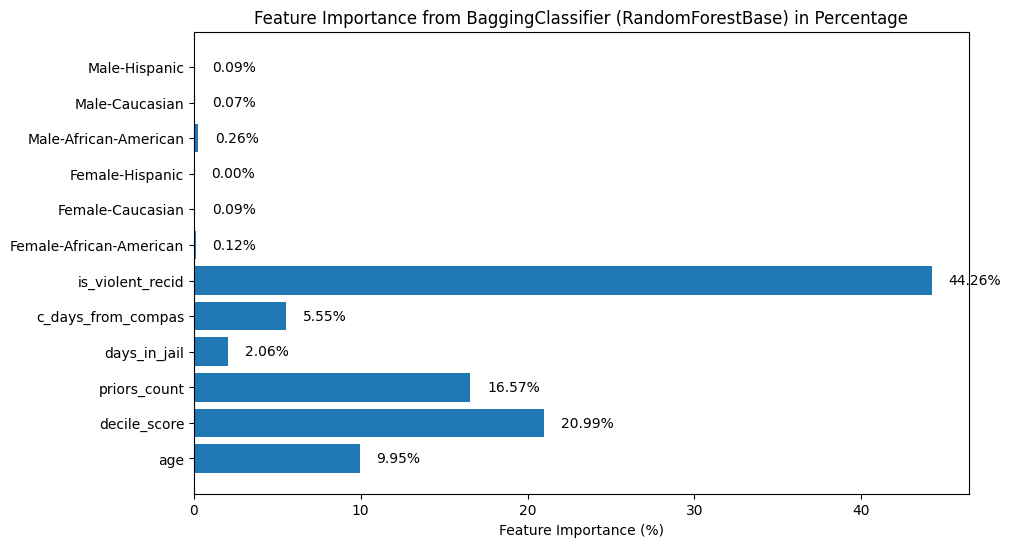

age: 9.95%
decile_score: 20.99%
priors_count: 16.57%
days_in_jail: 2.06%
c_days_from_compas: 5.55%
is_violent_recid: 44.26%
Female-African-American: 0.12%
Female-Caucasian: 0.09%
Female-Hispanic: 0.00%
Male-African-American: 0.26%
Male-Caucasian: 0.07%
Male-Hispanic: 0.09%


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Access the base models (RandomForestClassifiers) from the BaggingClassifier
base_models = bagging_model.estimators_

importances = np.zeros(X_train.shape[1])

# Iterate through each base model and accumulate the feature importances
for model in base_models:
    importances += model.feature_importances_

# Average the feature importances across all models
importances /= len(base_models)

importances_percent = 100 * importances / importances.sum()

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, importances_percent)
plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance from BaggingClassifier (RandomForestBase) in Percentage")

# Annotate each bar with the percentage value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')

plt.show()

for feature, importance in zip(feature_names, importances_percent):
    print(f"{feature}: {importance:.2f}%")


## i try to find accuracy score for both test and trian data to underestood that the performance of our model is it overfit or under fit
overfit when happen that our model learn all complexity of train data and have high accuracy or other classification metrics but in test data can not get good accuracy
Underfit when happen that the prformance of our model in both train and test is low
#### So according our result we can underestand that our model regulize good because the diffrence between train and test is not high   

In [39]:
train_score111 = accuracy_score(Y_train, bagging_model.predict(X_train)) * 100

test_score111 = accuracy_score(Y_test, bagging_model.predict(X_test)) * 100
print(f'Test accuracy:{test_score111}\nTrain accuracy:{train_score111}' )

Test accuracy:74.22680412371135
Train accuracy:74.06520537852275


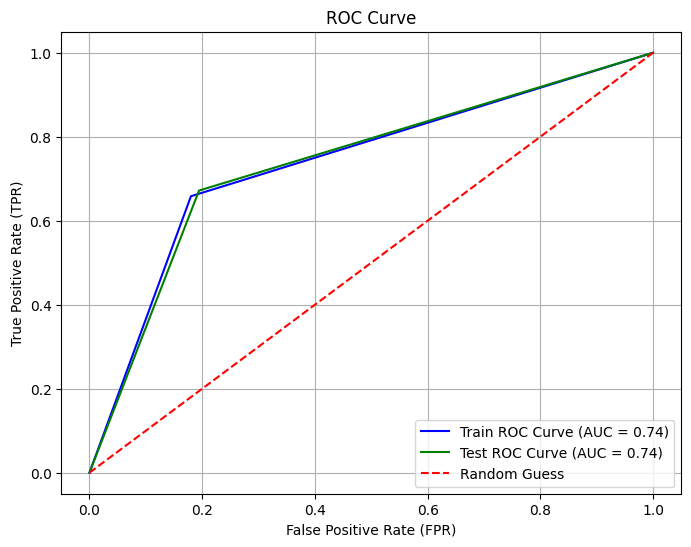

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_train_prob = bagging_model.predict(X_train)
y_pred_test_prob = bagging_model.predict(X_test)

# Calculate ROC curve and AUC for train and test
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_pred_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_pred_test_prob)

auc_train = roc_auc_score(Y_train, y_pred_train_prob)
auc_test = roc_auc_score(Y_test, y_pred_test_prob)

# Plot ROC curves for both train and test
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f"Train ROC Curve (AUC = {auc_train:.2f})")
plt.plot(fpr_test, tpr_test, color='green', label=f"Test ROC Curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### we can use auc curve value as the result instead of accuracy

In [18]:

calculateAUC(bagging_model)


AUC: 0.8179


0.817911015889243

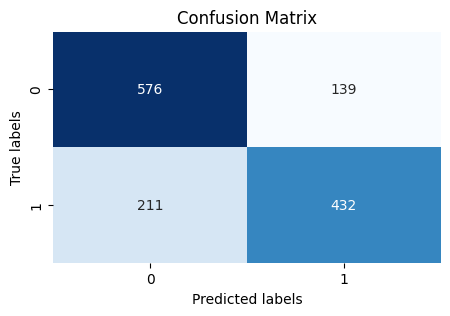

In [19]:
conf_matrix1 = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [20]:
import shap

shap.initjs()

In [21]:
import shap

# Assuming `bagging_model` is your trained BaggingClassifier with RandomForest as the base estimator
explainer= shap.TreeExplainer(bagging_model.estimators_[0])  # Use only one of the estimators (RandomForestClassifier) for the explainer
shap_values = explainer(X_test)




In [22]:
print(type(shap_values))
print(shap_values.shape)


<class 'shap._explanation.Explanation'>
(1358, 12, 2)


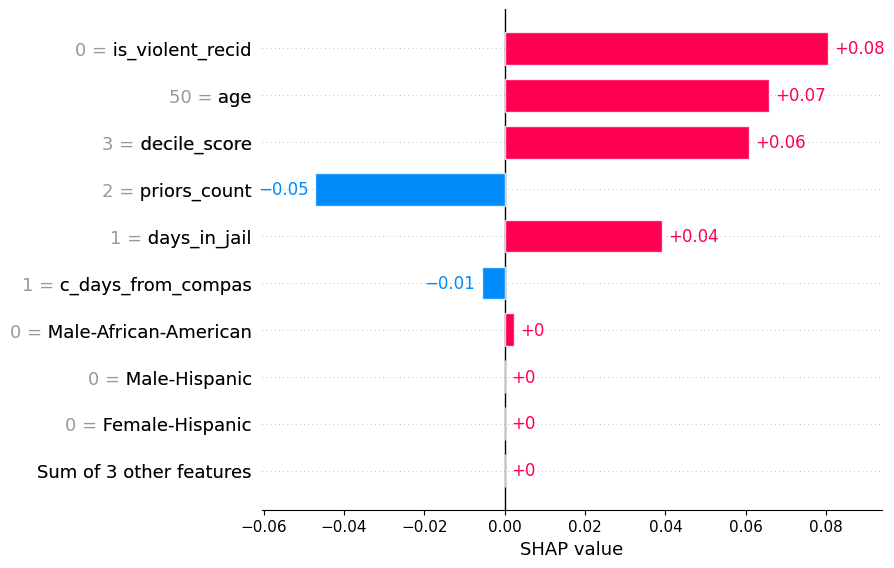

In [23]:

# Now plot the waterfall chart for the first instance
shap.plots.bar(shap_values[0, :, 0])  # First instance, first class




---
### The table for shape value for class 0


In [24]:
import shap
import pandas as pd
#Shap value
shap_values_class_0 = shap_values.values[:, :, 0]  # For the first class

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table = pd.DataFrame(
    shap_values_class_0,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Add base values (optional)
shap_table['Base Value'] = shap_values.base_values[:, 0]  # Base value for class 0
shap_table['SHAP Prediction'] = shap_table.sum(axis=1) + shap_table['Base Value']


In [44]:
shap_table.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,Female-African-American,Female-Caucasian,Female-Hispanic,Male-African-American,Male-Caucasian,Male-Hispanic,Base Value,SHAP Prediction
3231,0.065802,0.060846,-0.047134,0.039098,-0.005727,0.080436,0.0,0.0,0.0,0.002244,0.0,0.0,0.510317,1.216199
1608,-0.158164,-0.049563,-0.089483,0.005548,-0.026657,0.050153,0.0,0.0,0.0,0.003933,0.0,0.0,0.510317,0.756402
5548,0.058343,0.135608,0.083507,0.008167,-0.005461,0.092171,0.0,0.0,0.0,0.004631,0.0,0.0,0.510317,1.397600
435,0.083981,-0.113320,-0.121350,-0.015481,-0.006981,0.059295,0.0,0.0,0.0,-0.003397,0.0,0.0,0.510317,0.903380
2183,-0.211138,-0.133598,0.082214,-0.006523,0.036015,0.058202,0.0,0.0,0.0,-0.062762,0.0,0.0,0.510317,0.783044




---
### The table for shape value for class 1



In [25]:
import shap
import pandas as pd
#Shap value
shap_values_class_1 = shap_values.values[:, :, 1]  # For the first class

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table1 = pd.DataFrame(
    shap_values_class_1,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Add base values (optional)
shap_table1['Base Value'] = shap_values.base_values[:, 0]  # Base value for class 0
shap_table1['SHAP Prediction'] = shap_table1.sum(axis=1) + shap_table1['Base Value']



In [26]:
shap_table1.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,Female-African-American,Female-Caucasian,Female-Hispanic,Male-African-American,Male-Caucasian,Male-Hispanic,Base Value,SHAP Prediction
3231,-0.065802,-0.060846,0.047134,-0.039098,0.005727,-0.080436,0.0,0.0,0.0,-0.002244,0.0,0.0,0.510317,0.825068
1608,0.158164,0.049563,0.089483,-0.005548,0.026657,-0.050153,0.0,0.0,0.0,-0.003933,0.0,0.0,0.510317,1.284866
5548,-0.058343,-0.135608,-0.083507,-0.008167,0.005461,-0.092171,0.0,0.0,0.0,-0.004631,0.0,0.0,0.510317,0.643667
435,-0.083981,0.113320,0.121350,0.015481,0.006981,-0.059295,0.0,0.0,0.0,0.003397,0.0,0.0,0.510317,1.137887
2183,0.211138,0.133598,-0.082214,0.006523,-0.036015,-0.058202,0.0,0.0,0.0,0.062762,0.0,0.0,0.510317,1.258223


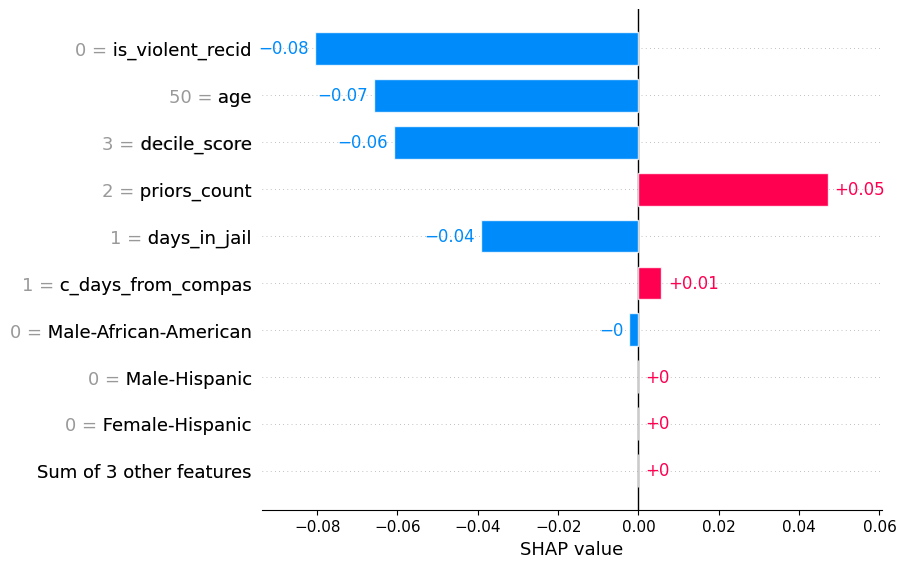

In [27]:
shap.plots.bar(shap_values[0, :, 1])  # First instance, second class


### Lime

In [28]:
! pip install lime

In [29]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


In [30]:
# Initialize LIME Explainer with numeric class names (0 and 1)
explainer = LimeTabularExplainer(
    training_data=X_train.values,   # Use training data
    feature_names=X_train.columns,  # Feature names
    class_names=[0, 1],             # Numeric class names
    mode='classification'           # Mode of the model
)


In [31]:
X_train.columns

Index(['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female-African-American',
       'Female-Caucasian', 'Female-Hispanic', 'Male-African-American',
       'Male-Caucasian', 'Male-Hispanic'],
      dtype='object')

In [32]:
# Select a sample to explain (e.g., the first instance in the test set)
sample_index = 0
sample = X_test.iloc[sample_index].values

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    data_row=sample,                # The instance to explain
    predict_fn=bagging_model.predict_proba  # The prediction function of your model
)

# Display explanation
explanation.show_in_notebook(show_table=True)


In [33]:
lime_values = explanation.as_list()
lime_table = pd.DataFrame(lime_values, columns=['Feature', 'Contribution'])

# Display the table
print(lime_table)

                           Feature  Contribution
0         is_violent_recid <= 0.00     -0.583735
1       c_days_from_compas <= 1.00      0.095882
2      0.00 < priors_count <= 2.00     -0.071711
3                      age > 43.00     -0.058654
4      2.00 < decile_score <= 4.00     -0.037967
5          Female-Hispanic <= 0.00     -0.022896
6      0.00 < days_in_jail <= 1.00     -0.016399
7    Male-African-American <= 0.00     -0.005465
8  Female-African-American <= 0.00     -0.005020
9         Female-Caucasian <= 0.00      0.004119




---



---



---



### 3.Permutation Feature Importance




In [34]:
from sklearn.inspection import permutation_importance


In [35]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Assuming xgb_model is the trained model and X_test, Y_test are your test data
result = permutation_importance(bagging_model, X_test, Y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display the results with feature names
importance_df = pd.DataFrame({
    'Feature': X_test.columns,  # Feature names
    'Importance': result.importances_mean  # Mean permutation importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print(importance_df)


                    Feature  Importance
2              priors_count    0.089396
5          is_violent_recid    0.067378
1              decile_score    0.027982
0                       age    0.023490
4        c_days_from_compas    0.007953
9     Male-African-American    0.001252
6   Female-African-American    0.001178
3              days_in_jail    0.000589
7          Female-Caucasian    0.000589
11            Male-Hispanic    0.000147
8           Female-Hispanic    0.000000
10           Male-Caucasian   -0.000810




---



---



---



### 4. Accumulated Local Effects (ALE)

In [ ]:
! pip install alibi

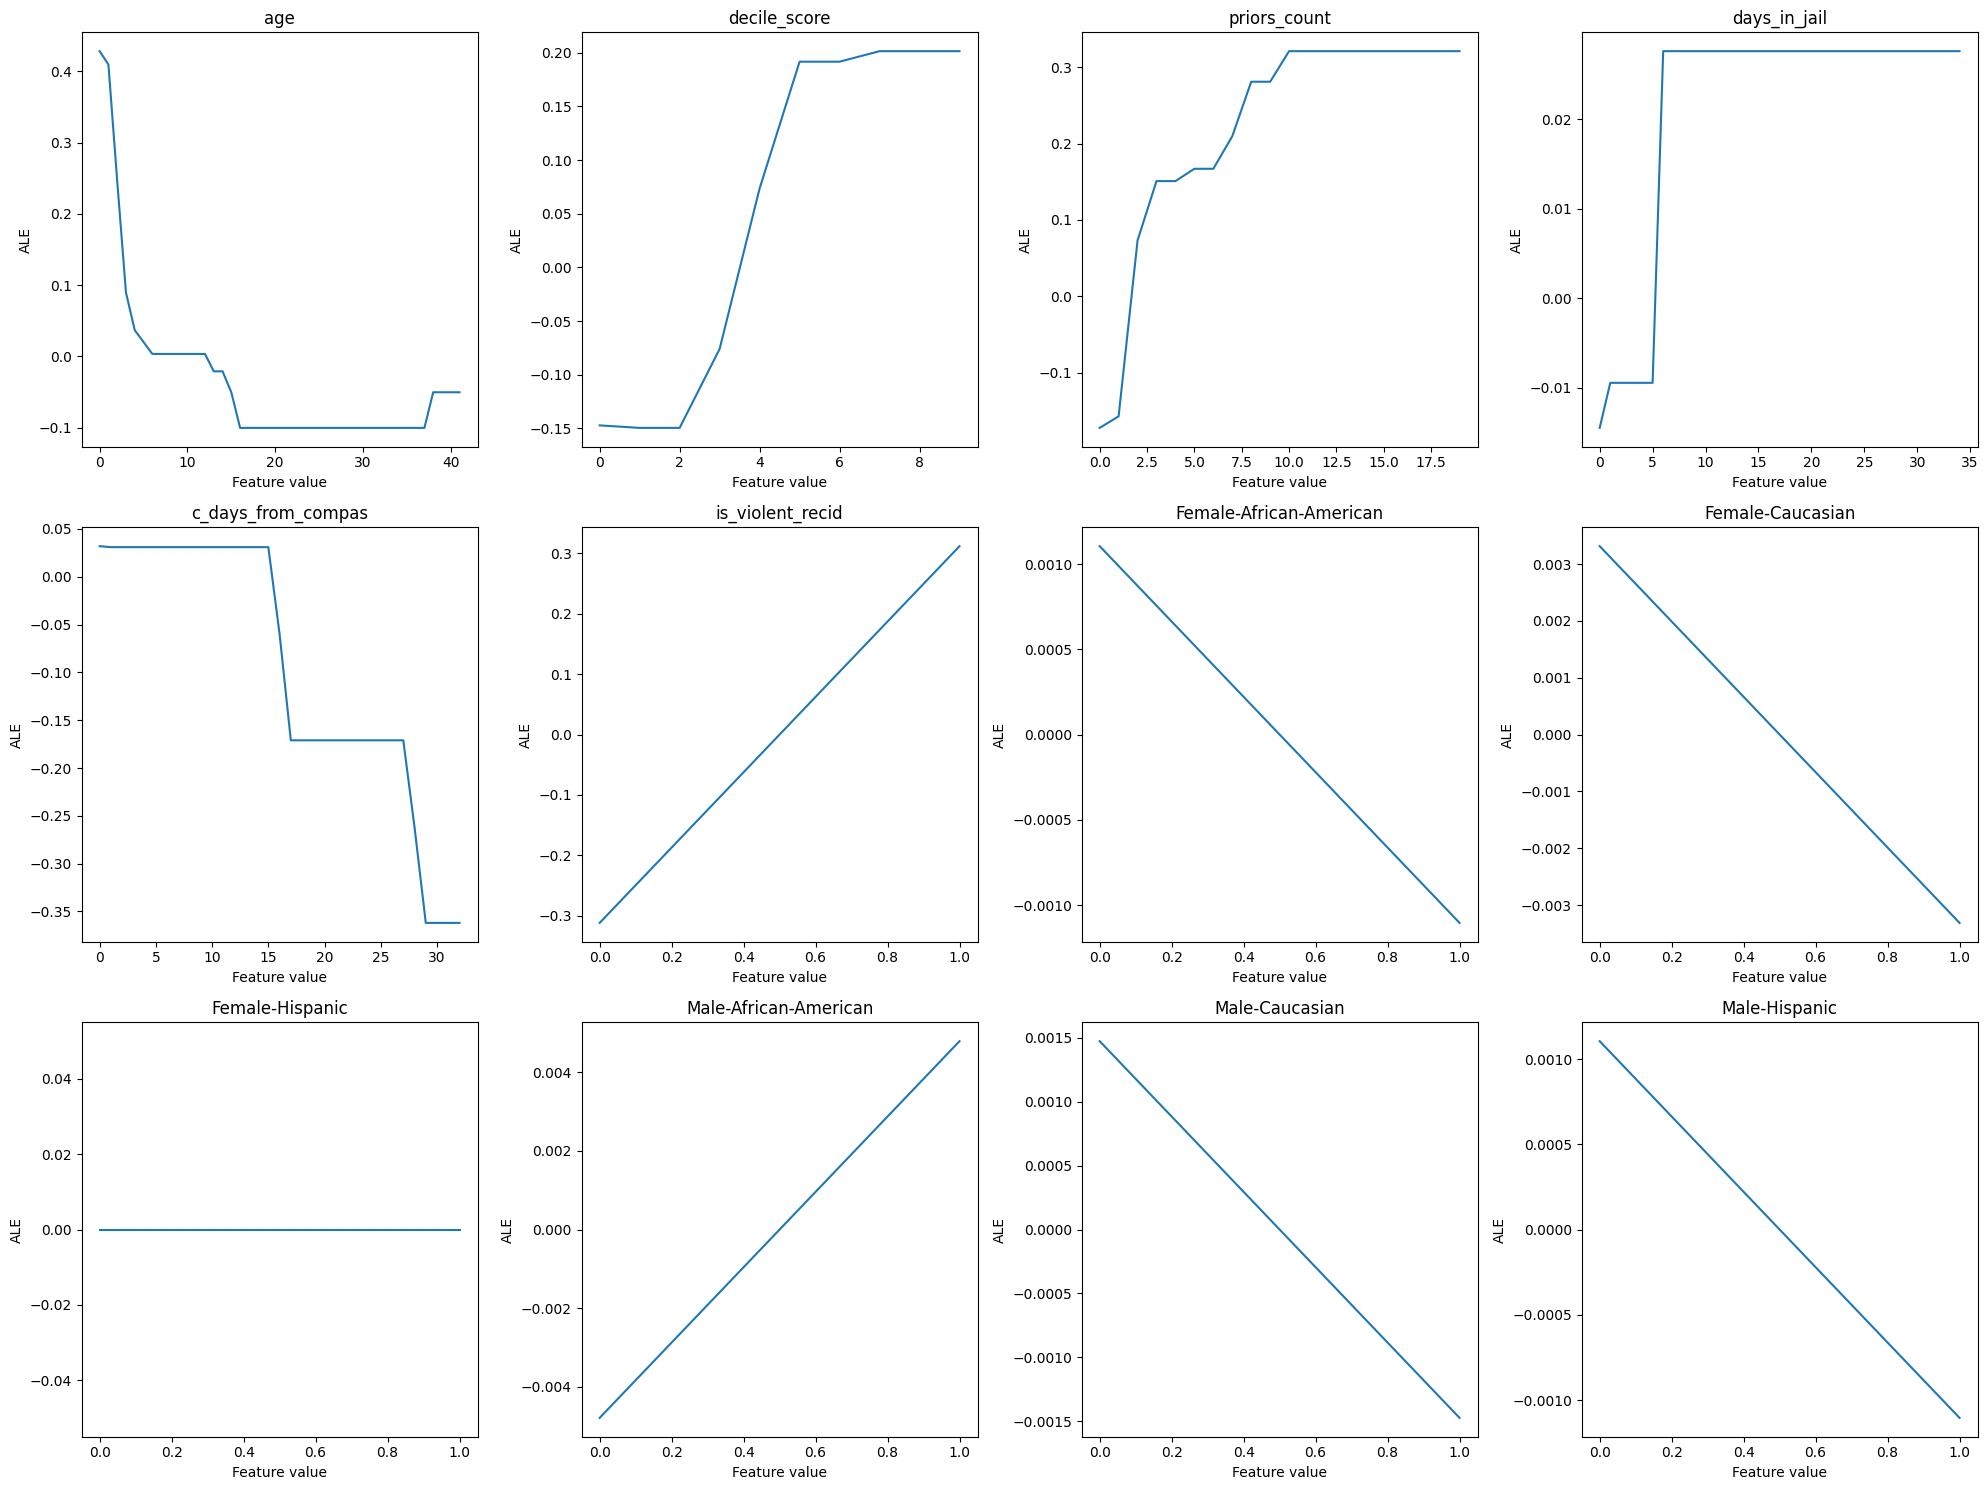

In [36]:
from alibi.explainers import ALE
import matplotlib.pyplot as plt

ale = ALE(bagging_model.predict, feature_names=X.columns.tolist())

ale_exp = ale.explain(X_test.values)

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for i, axi in enumerate(ax.flat):
    if i < len(X.columns):
        axi.plot(ale_exp.ale_values[i])
        axi.set_title(X_test.columns[i])
        axi.set_xlabel('Feature value')
        axi.set_ylabel('ALE')
plt.tight_layout()
plt.show()


In [37]:
ale_scores = ale_exp.ale_values

# Print the ALE scores for each feature in the test data
for i, feature_name in enumerate(X.columns):
    print(f"ALE scores for feature '{feature_name}': {ale_scores[i]}")

ALE scores for feature 'age': [[ 0.42845163]
 [ 0.40958371]
 [ 0.2463184 ]
 [ 0.08945566]
 [ 0.03682408]
 [ 0.02015741]
 [ 0.00349075]
 [ 0.00349075]
 [ 0.00349075]
 [ 0.00349075]
 [ 0.00349075]
 [ 0.00349075]
 [ 0.00349075]
 [-0.0208995 ]
 [-0.0208995 ]
 [-0.05031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.10031126]
 [-0.05031126]
 [-0.05031126]
 [-0.05031126]
 [-0.05031126]]
ALE scores for feature 'decile_score': [[-0.14713271]
 [-0.14946916]
 [-0.14946916]
 [-0.07593975]
 [ 0.07359296]
 [ 0.1917032 ]
 [ 0.1917032 ]
 [ 0.20150712]
 [ 0.20150712]
 [ 0.20150712]]
ALE scores for feature 'priors_count': [[-0.17223494]
 [-0.15708343]
 [ 0.07317973]
 [ 0.15084963]
 [ 0.15084963]
 [ 0.16697867]
 [ 0.16697867]
 [ 0.